In [577]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix



In [578]:
#pull data
excel_file = 'test_data 1.xlsm'
test_data_1 = pd.read_excel(excel_file)


train = test_data_1
test = test_data_1

In [579]:
#fill in blank spaces in data
data = train.fillna(method='ffill')

In [580]:
#show visual of data pulled
train.head(10)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE,CRS_ELAPSED_TIME.1,FLIGHTS,DISTANCE.1
0,2018,1,1,27,6,FLL,IAH,615,602,-13,0,808,756,-12,0,173,966,173.0,1.0,966.0
1,2018,1,1,27,6,SEA,SFO,618,614,-4,0,831,813,-18,1,133,679,133.0,1.0,679.0
2,2018,1,1,27,6,DCA,IAH,830,828,-2,0,1107,1108,1,0,217,1208,217.0,1.0,1208.0
3,2018,1,1,27,6,LAX,ORD,650,641,-9,0,1250,1242,-8,0,240,1744,240.0,1.0,1744.0
4,2018,1,1,27,6,JAX,EWR,1824,1810,-14,0,2045,2021,-24,1,141,820,141.0,1.0,820.0
5,2018,1,1,27,6,IAH,PHX,1420,1413,-7,0,1618,1559,-19,1,178,1009,178.0,1.0,1009.0
6,2018,1,1,27,6,EWR,HNL,815,842,27,1,1438,1457,19,1,683,4962,683.0,1.0,4962.0
7,2018,1,1,27,6,HNL,EWR,1615,1623,8,0,653,630,-23,1,578,4962,578.0,1.0,4962.0
8,2018,1,1,27,6,LAS,SFO,1520,1515,-5,0,1703,1641,-22,1,103,414,103.0,1.0,414.0
9,2018,1,1,27,6,IAD,TPA,1753,1746,-7,0,2019,2001,-18,1,146,811,146.0,1.0,811.0


In [581]:

y_train= train["ARR_DEL15"]

In [582]:
#removing unused inputs
train = train.drop(['YEAR','MONTH','DAY_OF_MONTH','ORIGIN','DEST','DEP_TIME','CRS_DEP_TIME','DEP_DELAY','ARR_DELAY','QUARTER','DAY_OF_WEEK','FLIGHTS','ARR_DEL15','CRS_ELAPSED_TIME','DISTANCE','DISTANCE.1','CRS_ELAPSED_TIME.1','DEP_DEL15'], axis=1)
test = test.drop(['YEAR','MONTH','DAY_OF_MONTH','ORIGIN','DEST','DEP_TIME','CRS_DEP_TIME','DEP_DELAY','ARR_DELAY','QUARTER','DAY_OF_WEEK','FLIGHTS','ARR_DEL15','CRS_ELAPSED_TIME','DISTANCE','DISTANCE.1','CRS_ELAPSED_TIME.1','DEP_DEL15'], axis=1)


In [583]:
#CREATE TWO COLUMNS TO REPRESENT TOTAL TIME AND DELAYS

train['total_time'] = train['CRS_ARR_TIME'] - train['ARR_TIME']
train['on_time/delayed'] = np.where(train['total_time']>= 15, 1, 0)
#delay=1 on-time=0
train.head()

,CRS_ARR_TIME,ARR_TIME,total_time,on_time/delayed
0,808,756,52,1
1,831,813,18,1
2,1107,1108,-1,0
3,1250,1242,8,0
4,2045,2021,24,1


In [584]:
#size of data training and testing

train_size = int(len(train) * .8)
print ("Train_data_size: %d" % train_size)

test_size = int(len(test) * .8)
print ("Test_data_size: %d" % test_size)


Train_data_size: 3997
Test_data_size: 3997


In [585]:
#preprocessing
features = train.columns[:2]
features

Index(['CRS_ARR_TIME', 'ARR_TIME'], dtype='object')

In [586]:
# train_test_split function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [587]:
#Transform the data:/featured scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\acl112\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [594]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
classifier=RandomForestClassifier(n_estimators=1000,random_state=0)  
classifier.fit(X_train, y_train)  
y_pred =classifier.predict(X_test)

In [596]:
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
#clf.predict(test[features])

In [597]:
#accuracy calculation
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.871


In [598]:
from sklearn.metrics import classification_report


print(classification_report(y_test,y_pred))  


              precision    recall  f1-score   support

           0       0.87      0.76      0.81       360
           1       0.87      0.94      0.90       640

   micro avg       0.87      0.87      0.87      1000
   macro avg       0.87      0.85      0.86      1000
weighted avg       0.87      0.87      0.87      1000



Area under the ROC curve: 0.15425347222222224


Text(0.5, 1.0, 'Receiver operating characteristic (ROC)')

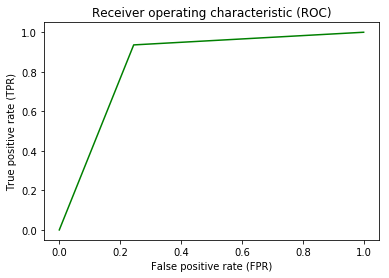

In [599]:

y_pred = classifier.predict(X_test)

labels = [0, 1]
cm = confusion_matrix(y_test, y_pred,labels)

fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = np.trapz(fpr,tpr)
print('Area under the ROC curve: ' + str(auc))

fig = plt.figure(1)
plt.plot(fpr,tpr,color='green')
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('Receiver operating characteristic (ROC)')

Text(0.5, 15.0, 'Predicted Label')

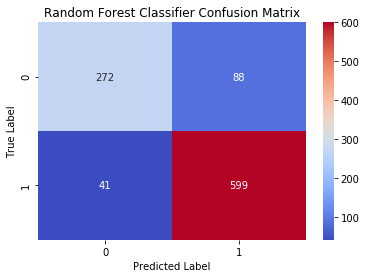

In [600]:
rfc_cm = confusion_matrix(y_test,y_pred)

ax = sns.heatmap(rfc_cm,annot=True,cmap='coolwarm',fmt='.0f')
ax.set_title('Random Forest Classifier Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')